In [1]:
import nltk
from textblob import TextBlob

### Using TextBlob to calculte sentiment

#### Positive Test

In [2]:
string1 = "You are a great person"

In [3]:
blob1 = TextBlob(string1)

In [4]:
blob1.sentiment

Sentiment(polarity=0.8, subjectivity=0.75)

#### Negative Test

In [5]:
string2 = "These are horrible times"
blob2 = TextBlob(string2)
blob2.sentiment

Sentiment(polarity=-1.0, subjectivity=1.0)

### Mixture test

In [6]:
string3 = "You are a bad person, but you are also my brother, therefore I love you"

In [7]:
blob3 = TextBlob(string3)
blob3.sentiment

Sentiment(polarity=-0.09999999999999992, subjectivity=0.6333333333333333)

# Reddit

In [9]:
import praw

In [10]:
reddit = praw.Reddit('test-bot')

In [11]:
subreddit = reddit.subreddit("datascience")

In [12]:
test_sub = subreddit.hot(limit=5)

In [13]:
for post in test_sub:
    print("------------------")
    print("Title: ", post.title)
    print("Text: ", post.selftext)
    print("Author: ", post.author)
    print("Score: ", post.score)

------------------
Title:  Weekly Entering & Transitioning Thread | 28 Apr 2019 - 05 May 2019
Text:  Welcome to this week's entering & transitioning thread! This thread is for any questions about getting started, studying, or transitioning into the data science field. Topics include:

* Learning resources (e.g. books, tutorials, videos)  
* Traditional education (e.g. schools, degrees, electives)  
* Alternative education (e.g. online courses, bootcamps)  
* Job search questions (e.g. resumes, applying, career prospects)  
* Elementary questions (e.g. where to start, what next)  

While you wait for answers from the community, check out the [FAQ](https://www.reddit.com/r/datascience/wiki/frequently-asked-questions) and [Resources](https://www.reddit.com/r/datascience/wiki/resources) pages on our wiki.  

[You can also search for past weekly threads here](https://www.reddit.com/r/datascience/search?q=weekly%20thread&restrict_sr=1&t=month).

^(Last configured: 2019-02-17 09:32 AM EDT)
Au

## Comments

In [34]:
import nltk
from textblob import TextBlob
import pandas as pd
import time
import praw

In [35]:
reddit = praw.Reddit('test-bot')

In [36]:
subreddit = reddit.subreddit("politics")

In [50]:
test_sub = subreddit.hot(limit=1).next()

In [55]:
test_comment = test_sub.comments[0]

In [58]:
print(type(test_comment.body))
print(type(test_comment.score))

<class 'str'>
<class 'int'>


In [91]:
test_comment.author.name

'sheepsleepdeep'

In [59]:
results = pd.DataFrame(columns=['Comment_ID', 'Body', 'Controversiality', 'Comment_Date',
                                'Comment_Score', 'Polarity', 'Subjectivity',
                                'Author', 'Author_flair_text', 'Author_LKarma', 'Author_CKarma', 'Author_Date',
                                'Submission_ID', 'Submission_title', 'Submission_Date',
                                'Submission_Title_Polarity', 'Submission_Title_Subjectivity',
                                'Submission_Score', 'Submission_Author', 'Submission_Author_LKarma',
                                'Submission_Author_CKarma', 'Submission_Author_Date', 'Subreddit',
                                ])

In [92]:
results = pd.DataFrame()

In [93]:
i = len(results)
for comment_tracker in subreddit.stream.comments():
    
    comment_sentiment = TextBlob(comment_tracker.body).sentiment
    thread_title_sentimet = TextBlob(comment_tracker.submission.title).sentiment
    
    if comment_sentiment[0] < -0.2:
        print("Found a negative comment")
        results.loc[i, 'Comment_ID'] = comment_tracker.id
        results.loc[i, 'Body'] = comment_tracker.body
        results.loc[i, 'Controversiality'] = comment_tracker.controversiality
        results.loc[i, 'Comment_Date'] = comment_tracker.created_utc
        results.loc[i, 'Comment_Score'] = comment_tracker.score
        results.loc[i, 'Polarity'] = comment_sentiment[0]
        results.loc[i, 'Subjectivity'] = comment_sentiment[1]
                
        results.loc[i, 'Author'] = comment_tracker.author.name
        results.loc[i, 'Author_flair_text'] = comment_tracker.author_flair_text
        results.loc[i, 'Author_LKarma'] = comment_tracker.author.link_karma
        results.loc[i, 'Author_CKarma'] = comment_tracker.author.comment_karma
        results.loc[i, 'Author_Date'] = comment_tracker.author.created_utc
        
        results.loc[i, 'Submission_ID'] = comment_tracker.submission.id
        results.loc[i, 'Submission_title'] = comment_tracker.submission.title
        results.loc[i, 'Submission_Date'] = comment_tracker.submission.created_utc
        results.loc[i, 'Submission_Title_Polarity'] = thread_title_sentimet[0]
        results.loc[i, 'Submission_Title_Subjectivity'] = thread_title_sentimet[1]
        results.loc[i, 'Submission_Score'] = comment_tracker.submission.score
        
        results.loc[i, 'Submission_Author'] = comment_tracker.submission.author.name
        results.loc[i, 'Submission_Author_LKarma'] = comment_tracker.submission.author.link_karma
        results.loc[i, 'Submission_Author_CKarma'] = comment_tracker.submission.author.comment_karma
        results.loc[i, 'Submission_Author_Date'] = comment_tracker.submission.author.created_utc
        results.loc[i, 'Subreddit'] = comment_tracker.subreddit.display_name
        
        i += 1
        if i > 5:
            break

Found a negative comment
Found a negative comment
Found a negative comment
Found a negative comment
Found a negative comment
Found a negative comment


In [94]:
results

,Comment_ID,Body,Controversiality,Comment_Date,Comment_Score,Polarity,Subjectivity,Author,Author_flair_text,Author_LKarma,...,Submission_title,Submission_Date,Submission_Title_Polarity,Submission_Title_Subjectivity,Submission_Score,Submission_Author,Submission_Author_LKarma,Submission_Author_CKarma,Submission_Author_Date,Subreddit
0,em7jsjl,Make America Hate Again,0.0,1.556701e+09,1.0,-0.800000,0.900000,PunkToTheFuture,:flag-us: America,14.0,...,[Megathread] Mueller Complained That Barr’s Le...,1.556671e+09,-0.300000,0.200000,31866.0,PoliticsModeratorBot,1295279.0,-100.0,1.436468e+09,politics
1,em7jskj,Wake me up when someone is actually held accou...,0.0,1.556701e+09,1.0,-0.357143,0.478571,Magikarpeles,:flag-gb: United Kingdom,3149.0,...,[Megathread] Mueller Complained That Barr’s Le...,1.556671e+09,-0.300000,0.200000,31879.0,PoliticsModeratorBot,1295279.0,-100.0,1.436468e+09,politics
2,em7juxa,He’s saying he doesn’t want the government to ...,0.0,1.556701e+09,1.0,-0.500000,0.900000,public_instigator,None,265.0,...,MSNBC Venezuela Coverage Shows Why U.S. Founde...,1.556700e+09,0.000000,0.000000,0.0,rapid_fire_maga,35.0,-13.0,1.555818e+09,politics
3,em7jxw2,Amending the first amendment is absolutely the...,0.0,1.556701e+09,1.0,-0.212500,0.658333,twdarkeh,:flag-ky: Kentucky,478.0,...,"Dear Republicans: Stop using my father, Ronald...",1.556650e+09,0.000000,0.000000,7402.0,segvcore,464103.0,135088.0,1.481249e+09,politics
4,em7k047,Gross. I am outraged!,0.0,1.556701e+09,1.0,-0.500000,0.500000,Itza_Chicken,None,1.0,...,Blumenthal: This devastates Barr's credibility,1.556674e+09,0.000000,0.000000,1828.0,Nervouskukk0101101,64908.0,6119.0,1.521176e+09,politics
5,em7k36n,"Hes a piece of shit, and anyone who votes for ...",0.0,1.556701e+09,1.0,-0.500000,0.800000,NathanBrazil2,None,72.0,...,Lindsey Graham's new line on Trump's obstructi...,1.556660e+09,0.136364,0.454545,755.0,JLBesq1981,260717.0,74142.0,1.551650e+09,politics


In [95]:
results.loc[0].to_json()

'{"Comment_ID":"em7jsjl","Body":"Make America Hate Again","Controversiality":0.0,"Comment_Date":1556700846.0,"Comment_Score":1.0,"Polarity":-0.8,"Subjectivity":0.9,"Author":"PunkToTheFuture","Author_flair_text":":flag-us: America","Author_LKarma":14.0,"Author_CKarma":18214.0,"Author_Date":1495475097.0,"Submission_ID":"bjaxml","Submission_title":"[Megathread] Mueller Complained That Barr\\u2019s Letter Did Not Capture \\u2018Context\\u2019 of Trump Probe","Submission_Date":1556670720.0,"Submission_Title_Polarity":-0.3,"Submission_Title_Subjectivity":0.2,"Submission_Score":31866.0,"Submission_Author":"PoliticsModeratorBot","Submission_Author_LKarma":1295279.0,"Submission_Author_CKarma":-100.0,"Submission_Author_Date":1436468186.0,"Subreddit":"politics"}'

In [96]:
import seaborn as sns

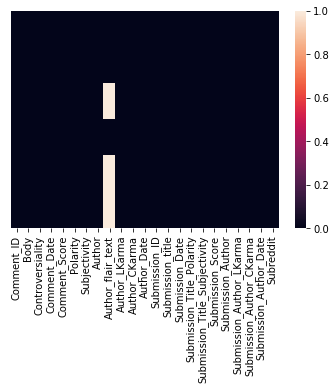

In [97]:
sns.heatmap(results.isnull(), yticklabels=False)